<a href="https://colab.research.google.com/github/chiaramarzi/ML-models-validation/blob/main/Holdout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial intelligence (AI) for health - potentials


*   **Data mining**: finding pattern in big data
*   **Biomarker discovery**: determining potential (compound) biomarkers
*   The **predicitive nature** of machine learning strategies is highly in line with the aim of clinical diagnosis and prognosis **in the single patient**

# Models validation



In machine learning, model validation is referred to as the process where a trained model is evaluated with a testing data set. The testing data set is a separate portion of the same data set from which the training set is derived.
Model validation is carried out after model training.

Estimation of **unbiased generalization performance** of the model

# Outline

* Holdout validation
* K-fold cross-validation (CV)
* Leave-One-Out CV (LOOCV)
* Hyperparameters tuning
* Training, validation and test set: the holdout validation
* training, validation and test set: the nested CV
* Sampling bias
* Repetition of holdout validation
* Repetition of CV
* Unbalanced datasets

# Age prediction based on neuroimaging features



*   Data: T1-weighted images of 86 healthy subjects with age ranging from 19 to 85 years (41 males and 45 females, age 44.2 ± 17.1 years, mean ± standard deviation). Data are freely accessible at [here](https://fcon_1000.projects.nitrc.org/) and described in (Mazziotta et al., 2001)
*   Features:
  * Cortical thickness (mCT)
  * Gyrification index (Pial_mean_GI)
  * Fractal dimension (FD)
* Task:
  * Regression
  * Classification ("young" vs. "old")

The same data and features have been previously investigated in (Marzi et al., 2020).


**References**

Marzi, C., Giannelli, M., Tessa, C. et al. Toward a more reliable characterization of fractal properties of the cerebral cortex of healthy subjects during the lifespan. Sci Rep 10, 16957 (2020). https://doi.org/10.1038/s41598-020-73961-w

Mazziotta, J. et al. A probabilistic atlas and reference system for the human brain: International Consortium for Brain Mapping (ICBM). Philos. Trans. R. Soc. Lond. B Biol. Sci. 356, 1293–1322. https://doi.org/10.1098/rstb.2001.0915 (2001).

# Libraries and data loading

In [21]:
# My repo cloning
#! git clone https://github.com/chiaramarzi/ML-models-validation

%cd /content/ML-models-validation
! git pull

/content/ML-models-validation
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/chiaramarzi/ML-models-validation
   5944280..fb56080  main       -> origin/main
Updating 5944280..fb56080
Fast-forward
 Holdout.ipynb | 52 ++++++++++++++++++++++++++++++++++++++++++----------
 utils.ipynb   |  4 ++--
 2 files changed, 44 insertions(+), 12 deletions(-)


In [22]:
# Libraries loading
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, accuracy_score

%run utils.ipynb import *

# Regression data
reg_data = pd.read_csv('ML-models-validation/data_regression.csv')

# Balanced classification data
class_data = pd.read_csv('ML-models-validation/data_classification_balanced.csv')

# Unbalanced classification data
unbal_class_data = pd.read_csv('ML-models-validation/data_classification_unbalanced.csv')

In [ ]:
reg_data

In [ ]:
class_data

In [ ]:
unbal_class_data

# Holdout validation

The principle is simple, you simply split your data randomly into roughly 70% used for training the model and 30% for testing the model. 










![](https://raw.githubusercontent.com/chiaramarzi/ML-models-validation/main/figures/IMG_4103.png)

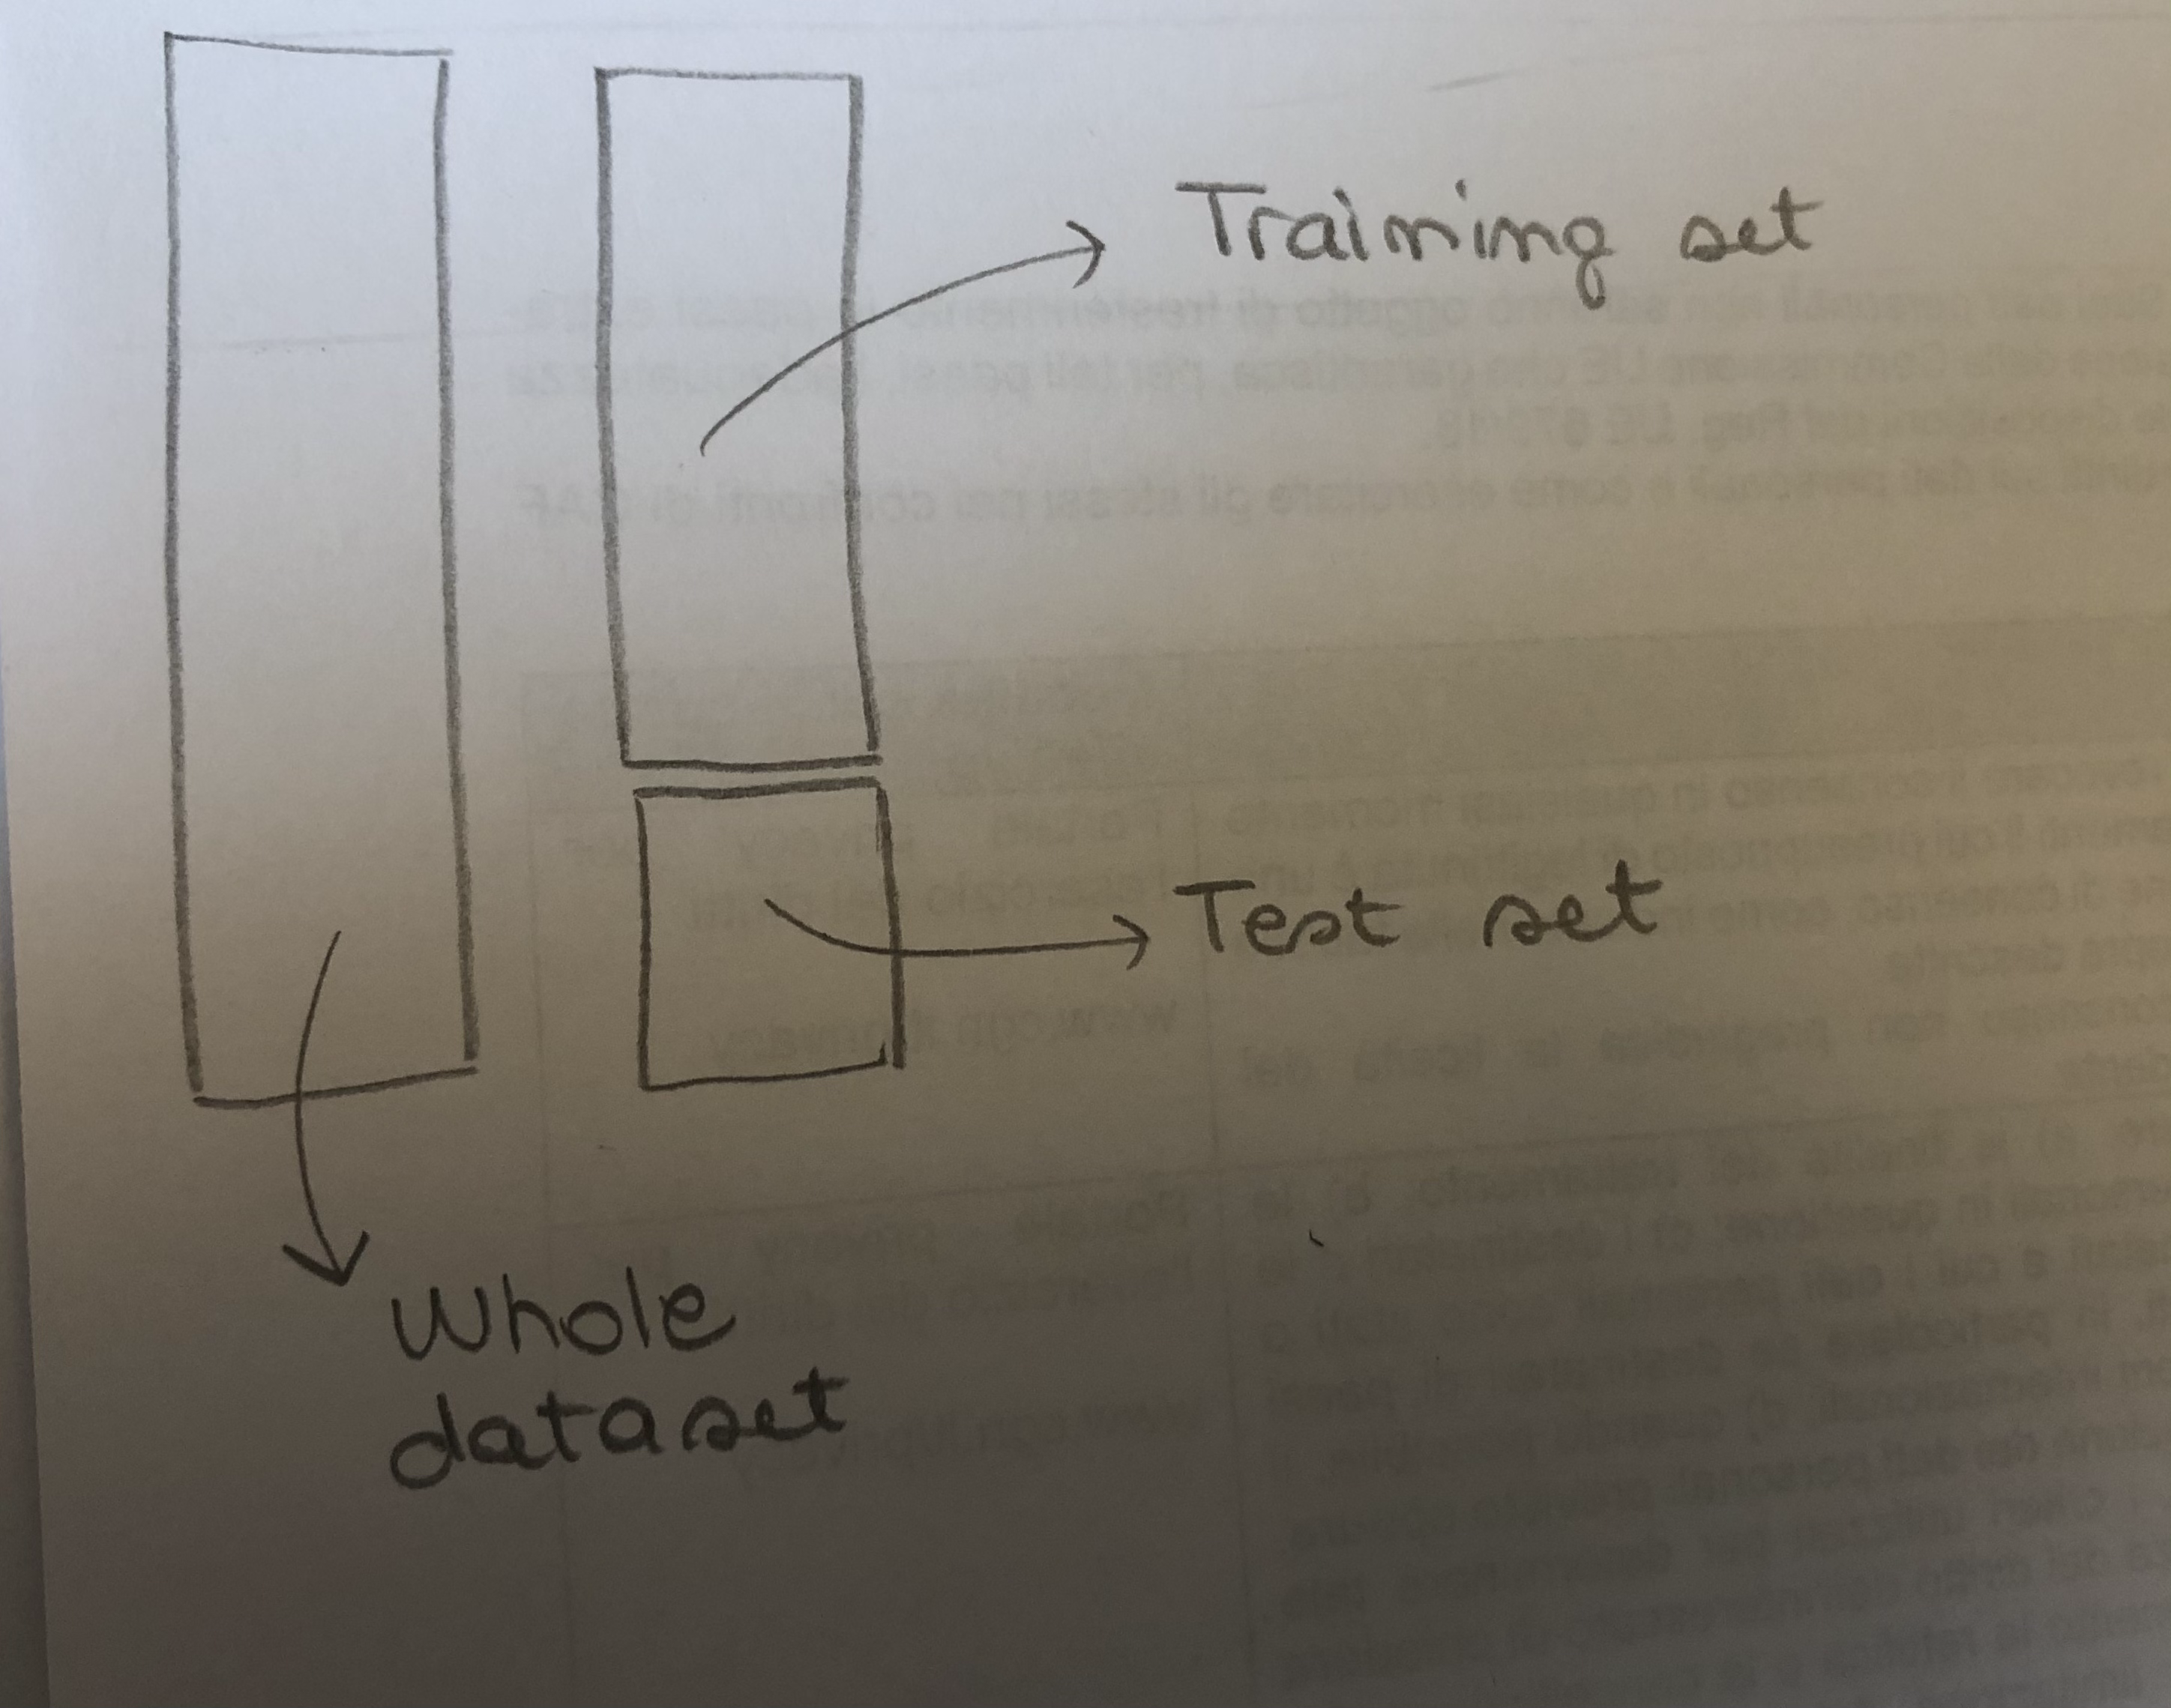

In [ ]:
Image('ML-models-validation/figures/IMG_4103.png')

In [23]:
SEED = 42 #563: good, 0: perfect, 42: worse

### REGRESSION ###
print('***Regression task')

X = reg_data.iloc[:,2:5]
y = reg_data['Age']

print('The whole dataset contains ' + str(np.shape(reg_data)[0]) + ' subjects')
print('The age prediction will be performed using ' + str(np.shape(X)[1]) + ' MRI-derived features')
print() 

regression_holdout(X, y, SEED)

***Regression task
The whole dataset contains 86 subjects
The age prediction will be performed using 3 MRI-derived features

MAE train: 12.654352088296422
MAE test: 17.914640956049176

